# Depth
* Humans get a depth perception from multiple cues: Texture changes, shadows, lighting, focus, perspective depth, etc..
* A camera could do this in multiple ways
  * We can take multiple pics from the same camera, in the same location by changing the DOV (aperture size)
    * This will give us various images where the objects not at focal length becomes progressively blurred
    * By the amount of blurring, we can get a sense of the depth of the various objects in the image
  * If the object is moving wrt to the camera
    * then also by the aparent change in the projection, we can figure out the depth (Z)
  * But the best way is still to have two slightly different views of the same object (**Stereo**)
  
## Estimating depth from stereo
* We need two important information to estimate the depth from a stereo image
  1. We need the relative pose between the 2 cameras (camera calibration)
  2. We'll need to find how a single object will get projected onto both the images (Image point correspondances)
* Let's assume that we've a parallel stereo camera setup (perfectly parallel optical axis)
![Parallel stereo](img/ParallelStereo.png)
  * We'll also assume that both the camera's are perfectly coplanar
  * And that they've the exact same focal length
  * The image will project to the left of the POC<sub>L</sub> and to the right of the POC<sub>R</sub>
  * Based on how far left and how far right, we can figure out the depth Z easily with basic geometry
$$Z = f\frac{B}{x_{l} - x_{r}}$$
where
Z is the distance of the object from the optical centers of both the cameras
B is the distance between the two optical centers
x<sub>l</sub> and x<sub>r</sub> are the projection offsets corresponding to each camera (keep the sign) 
  * Note that as the disparity decreases, the depth increases. For objects with infinite depth, the disparity will be 0
  * Take an image of the Moon with both the cameras, and the xl and xr is still going to be the same

## Computing the Disparity Map (Epipolar Geometry)
* Suppose a real world point projects onto the left image at the point p
* We don't know it's distance from the center of the camera yet
![](img/Epipolar.png)
  * The object can be at any distance from the image plane but on the same line
  * And all the points on this line from the real world will map to a line on the right image
  * We search for the corresponding point on that line and we are done
  * Note, we need not assume that the cameras are parallel to each other for this
* In each epipolar line, we look for the following
  * Similar pixel intensity
    * Brightness between the two cameras is very important
    * We will need to normalize the two cameras before we do this
    * Also, we need to choose larger regions to compare, so they contain significant patterns of intensity changes
  * Uniquness: i.e. there is only one good match in each search
  * Ordering: The pixels are ordered the same way in both the images
    * This goes for a toss when we are looking at a transparent surface
    * More importantly, because of occlusion, an object behind another object's location gets swapped (keep two fingers in a line in front of you and see with each eye)
  * Disparity gradienty: The depth should not change too quickly
* Be wary of occulsion, basically where some pixels are visible only in one of the images (like we see things differently when we close one of our eyes)
  
### Terms
* **Baseline**: The line that joins the two camera centers
* **Epipolar plane**: The plane that connects the Baseline with the world point, dissecting through both the image planes
* **Epipolar line**: The intersection of the epipolar plane with both the image planes
* **Epipole**: Intersection of the Baseline with the image planes

## Optimized implementation to find disparity
* DP: https://www.youtube.com/watch?v=bXC3MuHlojs

## Implementation

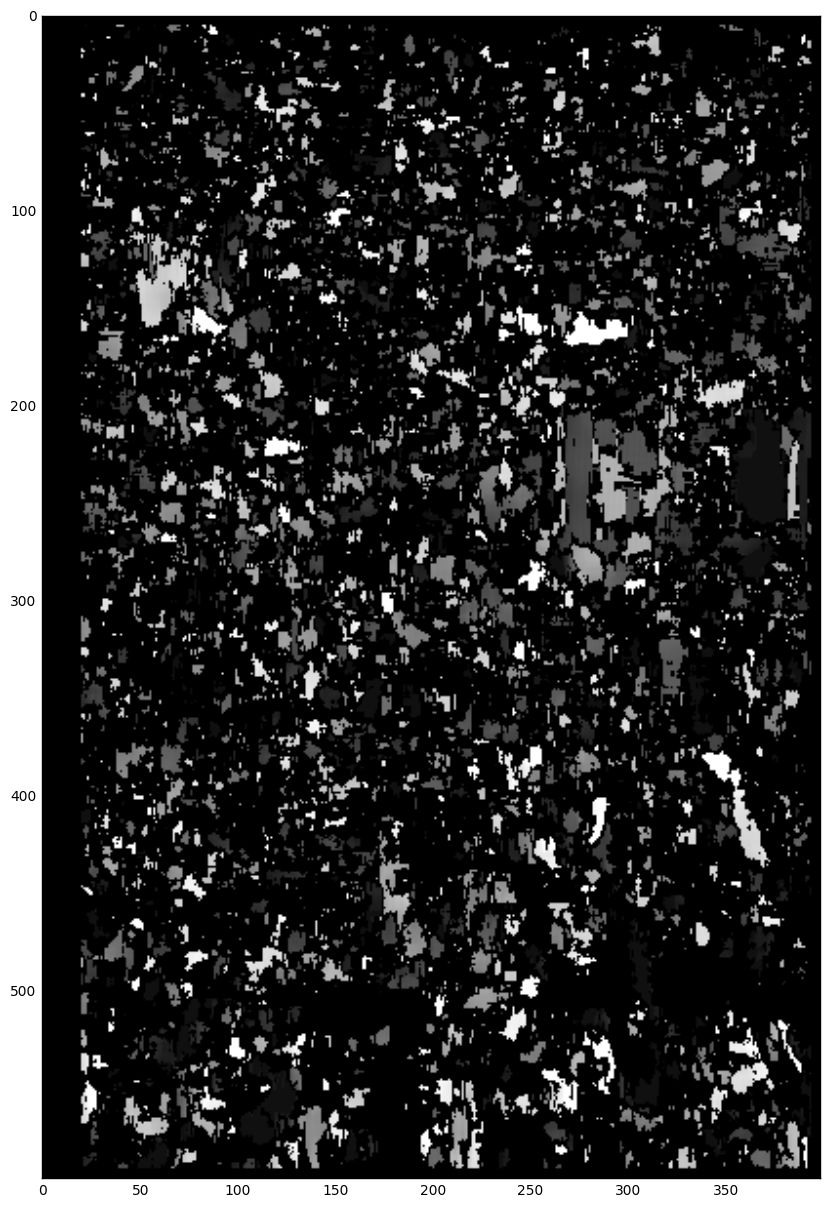

In [25]:
# Attempt to find a depth image from a stereo image pair
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
%matplotlib inline 

# Create a figure
fig = plt.figure(figsize=(30,15))

# Read in the images
imgL = cv2.imread('stereo_l.png',0)
imgR = cv2.imread('stereo_r.png',0)

# Compute the disparity
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=11)
disparity = stereo.compute(imgL,imgR)

# Show it
plt.imshow(disparity,'gray')
plt.show()

# Note: The images need to be good for this to work and even then, this is hard...
#Ref: http://docs.opencv.org/3.1.0/dd/d53/tutorial_py_depthmap.html